# PCA on MNIST Data

### 1. Without Scikit Learn library

In [57]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Importing Data

d0=pd.read_csv(r'C:\Users\abhij\Downloads\train.csv\train.csv')

In [9]:
#First five data display

d0.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Information anbout the data

d0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [15]:
#Making two dataframe from the imported data.
#1. label_data that contain the label coloumn
#2. pixel_data that contain the all pixel columns = 784

label_data=d0["label"] 
pixel_data=d0.drop("label",axis=1)
pixel_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#shape of the dataframes

print(label_data.shape)
print(pixel_data.shape)

(42000,)
(42000, 784)


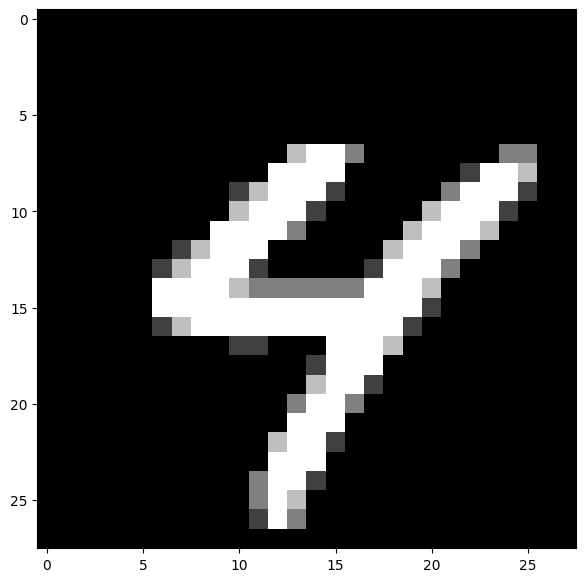

4


In [35]:
#Display or plot a number

plt.figure(figsize=(7,7))
idx=250

grid_data=pixel_data.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data, interpolation= "none", cmap="gray")
plt.show()

print(label_data[idx])


#### 2D Visualization using PCA

In [39]:
#taking subset of the dataset, 15K data points

labels=label_data.head(15000)
data=pixel_data.head(15000)


print("The shape of the data", data.shape )

The shape of the data (15000, 784)


In [40]:
#STEP I
#Data preprocessing: Standardization of the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [43]:
#STEP II
#Find the co-variance matrix which is: A^T*A

sample_data=standardized_data

#Matrix multiplication using numpy
covar_matrix=np.matmul(sample_data.T, sample_data)

print("The shape of co-variance matrix: ", covar_matrix.shape)

The shape of co-variance matrix:  (784, 784)


C:\Users\abhij\AppData\Local\Temp\ipykernel_19468\2141121098.py:7: RuntimeWarning: invalid value encountered in matmul
  covar_matrix=np.matmul(sample_data.T, sample_data)


In [45]:
#STEP III
#Finding the top 2 eigen-value and corresponding eigen-vector
#For projecting onto a 2=Dim space

from scipy.linalg import eigh

#the parameter "eigvals" is defined low value to high
# eigh function will return the eign values in asending order (It starts with 0,1,2,3,4....)
#this code generates only the top 2 (782,783) eignvalues

values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eign vector: ", vectors.shape)

#Converting the eign vectors into (2,d) shape for easyness of further computation

vectors=vectors.T

print("Updated shape of the eign vector: ", vectors.shape)

Shape of eign vector:  (784, 2)
Updated shape of the eign vector:  (2, 784)


C:\Users\abhij\AppData\Local\Temp\ipykernel_19468\2286090211.py:10: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values, vectors = eigh(covar_matrix, eigvals=(782,783))


In [47]:
#STEP IV
#Projecting the original data sample on the plane
#Formed by two principle eign vectors by vector - vector multiplication

new_coordinates = np.matmul(vectors, sample_data.T )

print("Resultant new data points shape,", vectors.shape, "X", sample_data.T.shape, "=", new_coordinates.shape  )


Resultant new data points shape, (2, 784) X (784, 15000) = (2, 15000)


In [ ]:
#Step V
#appending label to the 2nd projected data

new_coordinates =np.vstack((new_coordinates, labels)).T 

#Creating a new dataframe for plotting the labeled points
dataframe=pd.DataFrame(new_coordinates, columns=("1st Principal", "2nd Principal", "Label" ))


In [56]:
print(dataframe)

       1st Principal  2nd Principal  Label
0          -5.558661      -5.043558    1.0
1           6.193635      19.305278    0.0
2          -1.909878      -7.678775    1.0
3           5.525748      -0.464845    4.0
4           6.366527      26.644289    0.0
...              ...            ...    ...
14995       3.139416      -4.758956    1.0
14996       1.946714      -1.314215    4.0
14997      -2.147937      -1.507269    8.0
14998       3.204122      -6.537313    9.0
14999      -6.878969      -1.256254    6.0

[15000 rows x 3 columns]


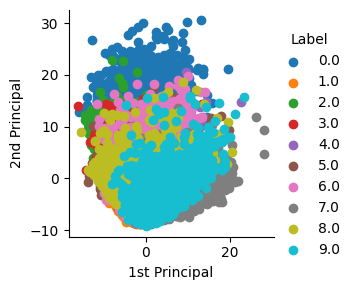

In [59]:
#Step VI
#Ploting the 2nd data points with seaborn

sns.FacetGrid(dataframe, hue="Label").map(plt.scatter, "1st Principal", "2nd Principal").add_legend()

## 2. PCA using Scikit-Learn

In [60]:
#Initializing the PCA

from sklearn import decomposition
pca = decomposition.PCA()

In [63]:
#Configuring the parameters
#The number of components-2

pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

#pca_reduced will contain the 2-d projects of simple data

print("Shape of PCA_reduced.shape = ", pca_data.shape)

Shape of PCA_reduced.shape =  (15000, 2)


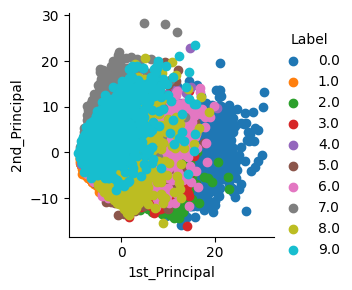

In [65]:
#appending label to the pca_data

pca_data =np.vstack((pca_data.T, labels)).T 

#Creating a new dataframe for plotting the labeled points
dataframe=pd.DataFrame(pca_data, columns=("1st_Principal", "2nd_Principal", "Label" ))

sns.FacetGrid(dataframe, hue="Label").map(plt.scatter, "1st_Principal", "2nd_Principal").add_legend()